In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import nbinom
from tqdm.notebook import trange, tqdm
import seaborn as sns 
import pandas as pd
import scipy.stats as stats

#%matplotlib notebook

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})

plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)

from matplotlib import cm, colors, colorbar
cmap = cm.get_cmap('viridis_r')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Function to scale-up the colormap regarding the age of the individual
def trans(x):
    a = 18/57
    b = 1
    return (x-a)/(b-a)

All the inference analysis on real data were performed using the class methods available in utils/full_inference_tools. 
**Remark**
$A = \tau^{-1}$ and $B = \theta^{-1}$

In [3]:
## Results of the inference for S1, S2, MPbeta, MPalpha, YB
###P3
A_P3 = np.array([-0.31402038, -0.31402038, -0.27625993, -0.2567954 , -0.23052102,
       -0.2251288 , -0.23053352, -0.25110638, -0.28754419, -0.3609712 ,
       -0.46874922, -0.57265123, -0.60609602, -0.53379117])
A_P3_err = np.array([0.03010724, 0.03010724, 0.02885052, 0.02938364, 0.02856642,
       0.02866415, 0.03365785, 0.03225998, 0.03837605, 0.05427912,
       0.09668126, 0.1135252 , 0.15082407, 0.11357856])
B_P3 = np.array([0.20939261, 0.20939261, 0.21690351, 0.22393034, 0.23294158,
       0.2402579 , 0.25172744, 0.28241968, 0.3537332 , 0.47468435,
       0.66777199, 0.8346176 , 0.8789646 , 0.83831288])
B_P3_err = np.array([0.02419785, 0.02419785, 0.02613197, 0.02530497, 0.03086372,
       0.03541774, 0.0348638 , 0.04664989, 0.0694717 , 0.10337856,
       0.1995851 , 0.16047709, 0.20008823, 0.13579055])

###P4
A_P4 = np.array([-0.33899975, -0.30272089, -0.26214746, -0.24277183, -0.23834802,
       -0.22568074, -0.25099427, -0.32360902, -0.34902087, -0.43101271,
       -0.52035608, -0.83375736, -0.83241119, -0.62396399])
A_P4_err = np.array([0.0085284 , 0.00791802, 0.00449601, 0.00912208, 0.00515741,
       0.01514763, 0.02773582, 0.04871143, 0.01932869, 0.03780793,
       0.0277149 , 0.08536917, 0.06369186, 0.25750091])

B_P4 = np.array([0.45074493, 0.46225775, 0.46967356, 0.4758764 , 0.49529015,
       0.48245649, 0.5418097 , 0.87944082, 0.98517916, 1.0542311 ,
       1.21886515, 1.47785786, 1.33087599, 1.22611019])
B_P4_err = np.array([0.01145982, 0.00805639, 0.01224395, 0.01953588, 0.00780943,
       0.02658801, 0.03595823, 0.17410984, 0.09481136, 0.05435831,
       0.21137076, 0.37766387, 0.28862259, 0.18677284])

###P6 beta
A_P6_beta = np.array([-0.14707124, -0.14707124, -0.11534869, -0.08613379, -0.08255328,
       -0.09177318, -0.10297632, -0.10008767, -0.08187944, -0.04767768,
       -0.04188368,  0.02018629,  0.02693291, -0.00238157])
A_P6_beta_err = np.array([0.04860392, 0.04860392, 0.01076118, 0.00829211, 0.00547916,
       0.00378921, 0.00363806, 0.00962537, 0.01078864, 0.01293259,
       0.01378962, 0.02050525, 0.00927396, 0.00719821])

B_P6_beta = np.array([0.1409258 , 0.1409258 , 0.19709249, 0.19622967, 0.20407467,
       0.21164949, 0.22917316, 0.25016793, 0.26955572, 0.25476055,
       0.23725685, 0.16225359, 0.11834641, 0.1047153 ])
B_P6_beta_err = np.array([0.08279192, 0.08279192, 0.02995125, 0.03153803, 0.03144363,
       0.0264483 , 0.02672435, 0.02587421, 0.03005633, 0.04051904,
       0.04361805, 0.04208993, 0.02141383, 0.0179099 ])

###P6 alpha
A_P6_alpha = np.array([-0.1247948 , -0.09905249, -0.08891382, -0.0873424 , -0.08732188,
       -0.08513647, -0.08197841, -0.05923807, -0.02638299,  0.01387177,
        0.05756348,  0.10339188,  0.1064932 ,  0.10130882])

A_P6_alpha_err = np.array([0.00689288, 0.01060347, 0.01087509, 0.01169527, 0.0081088 ,
       0.01037073, 0.0119971 , 0.0126808 , 0.01374629, 0.01224552,
       0.01711305, 0.01562535, 0.01152943, 0.00875642])

B_P6_alpha = np.array([0.16655104, 0.16866091, 0.173838  , 0.18420626, 0.19626572,
       0.21766389, 0.23922646, 0.24558271, 0.23467734, 0.1908341 ,
       0.15612782, 0.12121458, 0.10963785, 0.09227638])
B_P6_alpha_err = np.array([0.01702224, 0.01976717, 0.01949749, 0.02086341, 0.02224078,
       0.02538924, 0.03119845, 0.03608516, 0.04459864, 0.0324551 ,
       0.03078455, 0.03266058, 0.02095319, 0.01003768])

###P9
A_P9 = np.array([-0.11728954, -0.04835404, -0.01823364, -0.02163358, -0.0207305 ,
       -0.02923776, -0.03938855, -0.05070962, -0.05013025, -0.06651899,
       -0.06613541, -0.03882864, -0.06743096, -0.12951165])
A_P9_err = np.array([0.00628255, 0.01089386, 0.01935156, 0.01316055, 0.01489642,
       0.01417742, 0.0162307 , 0.01861891, 0.02180234, 0.02442195,
       0.03201769, 0.03449101, 0.02543406, 0.01881537])

B_P9 = np.array([0.09211787, 0.08645331, 0.03690246, 0.08515661, 0.08980447,
       0.09881692, 0.10447173, 0.10567664, 0.1181512 , 0.13879699,
       0.14025146, 0.10645719, 0.0917193 , 0.06787061])
B_P9_err = np.array([0.01906303, 0.01846389, 0.02911413, 0.01923114, 0.02054743,
       0.02188888, 0.02428085, 0.02374876, 0.02523934, 0.02800367,
       0.02386697, 0.02077303, 0.01609406, 0.00976362])

In [4]:
#fthresh = 1E-5 
A_thresh_1em5 = np.array([ A_P3[5], A_P4[5], A_P6_beta[4], A_P6_alpha[3], A_P9[4]])
B_thresh_1em5 = np.array([ B_P3[5], B_P4[5], B_P6_beta[4], B_P6_alpha[3], B_P9[4]])

A_thresh_err_1em5 = np.array([A_P3_err[5], A_P4_err[5], A_P6_beta_err[4], A_P6_alpha_err[3], A_P9_err[4]])
B_thresh_err_1em5 = np.array([B_P3_err[5], B_P4_err[5], B_P6_beta_err[4], B_P6_alpha_err[3], B_P9_err[4]])

In [5]:
f_thresh_vec_twins = np.logspace(-6, -3.5, 14)
f_thresh_vec_MP = np.logspace(-5.8, -3.5, 14)
f_thresh_vec_MP_alpha = np.logspace(-5.4, -3.5, 14)
f_thresh_vec_YB = np.logspace(-5.6, -3.5, 14)

In [6]:
# Build the dataframe without HR
A = -A_thresh_1em5
B = B_thresh_1em5 

A_err = A_thresh_err_1em5
B_err = B_thresh_err_1em5

d = {'A': A, 'B': B , 'A_err' : A_err, 'B_err' : B_err}
df_fthresh_1m5 = pd.DataFrame(data = d)

In [7]:
#add value of the colormap index
df_fthresh_1m5['cmap'] = np.array([ trans(21/57), trans(21/57), trans(28/57), trans(28/57), trans(57/57)])

## B/ alpha_theo vs alpha_inf

In [9]:
def alpha_err_func(A, dA, B, dB):
    return (2/B)*dA + np.abs(2*A/(B**2))*dB
A_thresh_1em5, B_thresh_1em5 = df_fthresh_1m5['A'], df_fthresh_1m5['B']
A_thresh_err_1em5, B_hresh_err_1em5 = df_fthresh_1m5['A_err'], df_fthresh_1m5['B_err'] 
alpha_dyn_inf = 2*A_thresh_1em5/B_thresh_1em5
alpha_dyn_err = alpha_err_func(A_thresh_1em5, A_thresh_err_1em5, B_thresh_1em5, B_thresh_err_1em5)

In [21]:
alpha_null_P9 = np.mean([-2.12554061, -2.02543194])
#alpha_null_Patient_3 = np.mean([np.array([-0.9924140178297096, -1.0392001407555118, -1.0008845465713057, -1.0080247654349548,-1.0173379589080598, -1.0027652402045957, -1.0157189718977282, -0.9993741280628488])])-1
alpha_null_P6_alpha = np.mean([-1.9282954, -1.90240558])
alpha_null_P6_beta = np.mean([-2.02192528, -2.01043465])
alpha_null_P3 = np.mean([-2.13538507, -2.15983246])
alpha_null_P4 = np.mean([-2.196335, -2.12211096, -2.18253516])
#alpha_null_Patient_1 = np.mean([np.array([-1.5413041433045693, -1.5189818323965012, -1.5057620821570976, -1.6120918510113957, -1.4364969283797406, -1.4888260781087121, -1.5363600571227614, -1.5035519661480177])])-1

In [22]:
alpha_null_P9_std = np.std([-2.12554061, -2.02543194])
#alpha_null_Patient_3_std = np.std([np.array([-0.9924140178297096, -1.0392001407555118, -1.0008845465713057, -1.0080247654349548,-1.0173379589080598, -1.0027652402045957, -1.0157189718977282, -0.9993741280628488])])
alpha_null_P6_alpha_std = np.std([-1.9282954, -1.90240558])
alpha_null_P6_beta_std = np.std([-2.02192528, -2.01043465])
alpha_null_P3_std = np.std([-2.13538507, -2.15983246])
alpha_null_P4_std = np.std([-2.196335, -2.12211096, -2.18253516])
#alpha_null_Patient_1_std = np.std([np.array([-1.5413041433045693, -1.5189818323965012, -1.5057620821570976, -1.6120918510113957, -1.4364969283797406, -1.4888260781087121, -1.5363600571227614, -1.5035519661480177])])

In [23]:
alpha_null = np.array([alpha_null_P9, alpha_null_P6_alpha, alpha_null_P6_beta, alpha_null_P4, alpha_null_P3])
alpha_null_err = np.array([alpha_null_P9_std, alpha_null_P6_alpha_std, alpha_null_P6_beta_std, alpha_null_P4_std, alpha_null_P3_std])

In [24]:
alpha_null = np.flip(alpha_null)
alpha_null_err = np.flip(alpha_null_err)

In [26]:
df_fthresh_1m5['alpha_dyn_inf'] = alpha_dyn_inf
df_fthresh_1m5['alpha_dyn_err'] = alpha_dyn_err
df_fthresh_1m5['alpha_null'] = -(alpha_null+1)
df_fthresh_1m5['alpha_null_err'] = -(alpha_null_err+1)

## C/ tau vs age

In [32]:
tau = 1/A_thresh_1em5
tau_err = np.array(A_thresh_err_1em5)/(np.array(A_thresh_1em5)**2)

#age
age = np.array([21, 21, 28, 28, 57])

## Persistence Probability

### Theory predictions

In [34]:
#P3 theory predictions
P_pers_P3_F1_F1 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F1_F1.npy')
P_pers_P3_F1_F2 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F1_F2.npy')
P_pers_P3_F2_F1 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F2_F1.npy')
P_pers_P3_F2_F2 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F2_F2.npy')

P_pers_P3_F1_F1_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F1_F1_minus.npy')
P_pers_P3_F1_F2_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F1_F2_minus.npy')
P_pers_P3_F2_F1_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F2_F1_minus.npy')
P_pers_P3_F2_F2_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F2_F2_minus.npy')

P_pers_P3_F1_F1_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F1_F1_plus.npy')
P_pers_P3_F1_F2_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F1_F2_plus.npy')
P_pers_P3_F2_F1_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F2_F1_plus.npy')
P_pers_P3_F2_F2_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S1_F2_F2_plus.npy')

#P4 theory predictions
P_pers_P4_F1_F1 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F1_F1.npy')
P_pers_P4_F1_F2 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F1_F2.npy')
P_pers_P4_F2_F1 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F2_F1.npy')
P_pers_P4_F2_F2 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F2_F2.npy')

P_pers_P4_F1_F1_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F1_F1_minus.npy')
P_pers_P4_F1_F2_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F1_F2_minus.npy')
P_pers_P4_F2_F1_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F2_F1_minus.npy')
P_pers_P4_F2_F2_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F2_F2_minus.npy')

P_pers_P4_F1_F1_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F1_F1_plus.npy')
P_pers_P4_F1_F2_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F1_F2_plus.npy')
P_pers_P4_F2_F1_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F2_F1_plus.npy')
P_pers_P4_F2_F2_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_S2_F2_F2_plus.npy')

#P6beta 

P_pers_P6b_F1_F1 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F1_F1.npy')
P_pers_P6b_F1_F2 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F1_F2.npy')
P_pers_P6b_F2_F1 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F2_F1.npy')
P_pers_P6b_F2_F2 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F2_F2.npy')

P_pers_P6b_F1_F1_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F1_F1_minus.npy')
P_pers_P6b_F1_F2_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F1_F2_minus.npy')
P_pers_P6b_F2_F1_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F2_F1_minus.npy')
P_pers_P6b_F2_F2_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F2_F2_minus.npy')

P_pers_P6b_F1_F1_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F1_F1_plus.npy')
P_pers_P6b_F1_F2_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F1_F2_plus.npy')
P_pers_P6b_F2_F1_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F2_F1_plus.npy')
P_pers_P6b_F2_F2_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_MPb_F2_F2_plus.npy')


#P9
P_pers_P9_bis_F1 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_YB_bis_F1.npy')
P_pers_P9_bis_F2 = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_YB_bis_F2.npy')

P_pers_P9_F1_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_YBb_F1_F1_minus.npy')
P_pers_P9_F2_minus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_YBb_F1_F2_minus.npy')

P_pers_P9_F1_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_YBb_F1_F1_plus.npy')
P_pers_P9_F2_plus = np.load('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/P_pers/P_pers_YBb_F1_F2_plus.npy')


In [35]:
P_pers_P3 = np.vstack([P_pers_P3_F1_F1, P_pers_P3_F1_F2, P_pers_P3_F2_F1, P_pers_P3_F2_F2])
P_pers_P4 = np.vstack([P_pers_P4_F1_F1, P_pers_P4_F1_F2, P_pers_P4_F2_F1, P_pers_P4_F2_F2])
P_pers_P6b = np.vstack([P_pers_P6b_F1_F1, P_pers_P6b_F1_F2])
P_pers_P9 = np.vstack([P_pers_P9_F1, P_pers_P9_F2])

P_pers_P3_plus = np.vstack([P_pers_P3_F1_F1_plus, P_pers_P3_F1_F2_plus, P_pers_P3_F2_F1_plus, P_pers_P3_F2_F2_plus])
P_pers_P4_plus = np.vstack([P_pers_P4_F1_F1_plus, P_pers_P4_F1_F2_plus, P_pers_P4_F2_F1_plus, P_pers_P4_F2_F2_plus])
P_pers_P6b_plus = np.vstack([P_pers_P6b_F1_F1_plus, P_pers_P6b_F1_F2_plus, P_pers_P6b_F2_F1_plus, P_pers_P6b_F2_F2_plus])
P_pers_P9_plus = np.vstack([P_pers_P9_F1_plus, P_pers_P9_F2_plus])

P_pers_P3_minus = np.vstack([P_pers_P3_F1_F1_minus, P_pers_P3_F1_F2_minus, P_pers_P3_F2_F1_minus, P_pers_P3_F2_F2_minus])
P_pers_P4_minus = np.vstack([P_pers_P4_F1_F1_minus, P_pers_P4_F1_F2_minus, P_pers_P4_F2_F1_minus, P_pers_P4_F2_F2_minus])
P_pers_P6b_minus = np.vstack([P_pers_P6b_F1_F1_minus, P_pers_P6b_F1_F2_minus, P_pers_P6b_F2_F1_minus, P_pers_P6b_F2_F2_minus])
P_pers_P9_minus = np.vstack([P_pers_P9_F1_minus, P_pers_P9_F2_minus])

In [37]:
P_pers_P3 = np.vstack([P_pers_P3_F1_F1, P_pers_P3_F1_F2, P_pers_P3_F2_F1, P_pers_P3_F2_F2])
P_pers_P3_mean = np.mean(P_pers_P3, axis = 0)
P_pers_P3_plus = np.vstack([P_pers_P3_F1_F1_plus, P_pers_P3_F1_F2_plus, P_pers_P3_F2_F1_plus, P_pers_P3_F2_F2_plus])
P_pers_P3_minus = np.vstack([P_pers_P3_F1_F1_minus, P_pers_P3_F1_F2_minus, P_pers_P3_F2_F1_minus, P_pers_P3_F2_F2_minus])
P_pers_P3_std_plus = np.mean(P_pers_P3_plus, axis = 0)
P_pers_P3_std_minus = np.mean(P_pers_P3_minus, axis = 0)

P_pers_P3_mean = np.mean(P_pers_P3, axis = 0)
P_pers_P4_mean = np.mean(P_pers_P4, axis = 0)
P_pers_P6b_mean = np.mean(P_pers_P6b, axis = 0)
P_pers_P9_mean = np.mean(P_pers_P9, axis = 0)

P_pers_P3_std_plus = np.mean(P_pers_P3_plus, axis = 0)
P_pers_P4_std_plus = np.mean(P_pers_P4_plus, axis = 0)
P_pers_P6b_std_plus = np.mean(P_pers_MP6b_plus, axis = 0)
P_pers_P9_std_plus = np.mean(P_pers_P9_plus, axis = 0)

P_pers_P3_std_minus = np.mean(P_pers_P3_minus, axis = 0)
P_pers_P4_std_minus = np.mean(P_pers_P4_minus, axis = 0)
P_pers_P6b_std_minus = np.mean(P_pers_P6b_minus, axis = 0)
P_pers_P9_std_minus = np.mean(P_pers_P9_minus, axis = 0)

### Empirical predictions

In [38]:
Pers_emp_P3_F1_0, Pers_emp_P3 = 0.9939736346516007, 0.6995876278695606
Pers_emp_P4_F1_0, Pers_emp_P4 = 0.99721059972106, 0.7884650725438299
Pers_emp_P6_0, Pers_emp_P6beta = 0.9987974462518869, 0.9844078156132762
Pers_emp_P9_F1_0, Pers_emp_P9 = 0.9991653915704548, 0.9791740622411549

## Complete figure

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


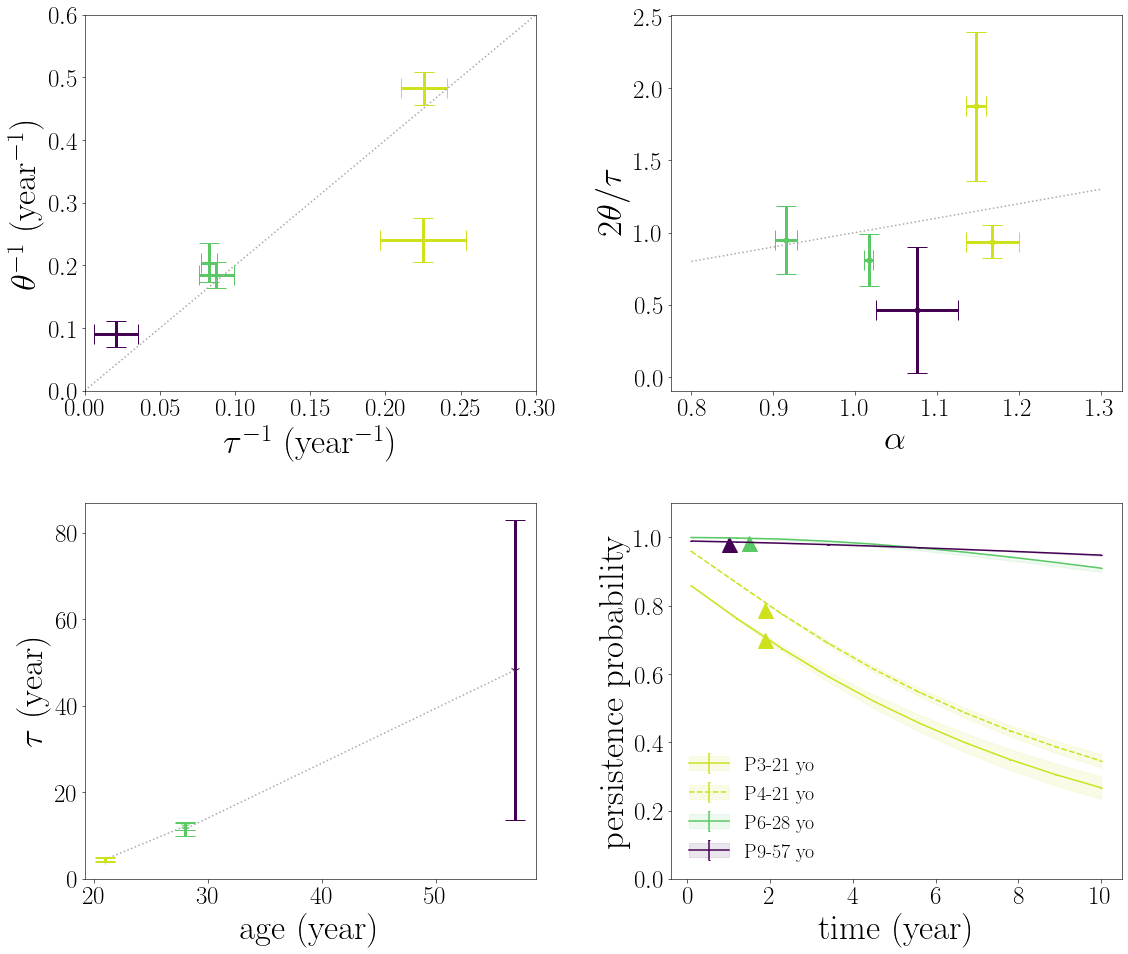

In [40]:
fig, axs = plt.subplots(2,2,figsize=(18,15))
plt.rc('text', usetex=True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})


# Subplot 1

X = np.linspace(0, 0.3, 100)
Y = 2*X

# New groups without HR
groups = {r'P05 $\beta$, 20-23/25 years old': (-0.35,0.72),
          r'P04 $\beta$, 20-23/25 years old': (0,0.08),
           r'P06 $\beta$, 31-32 years old' : (-0.1, 0.38),
            r'P06 $\alpha$, 31-32 years old': (-0.2, 0.25),
            r'P03 $\beta$, 57-58 years old': (-0.05, 0.2)}

axs[0,0].plot(X,Y, linestyle = 'dotted', color = 'DarkGrey', label =  r'$ 1/ \theta=2/ \tau$') 
for i, label in enumerate(groups.keys()):
    axs[0,0].errorbar(df_fthresh_1m5.loc[df_fthresh_1m5['label']==label, 'A'], df_fthresh_1m5.loc[df_fthresh_1m5['label']==label,'B'], xerr = df_fthresh_1m5.loc[df_fthresh_1m5['label']==label, 'A_err'], yerr= df_fthresh_1m5.loc[df_fthresh_1m5['label']==label, 'B_err'] , color = cmap(float(df_fthresh_1m5.loc[df_fthresh_1m5['label']==label, 'cmap'])), capsize = 10, linewidth = 3)

axs[0,0].set_xlabel(r'$  \tau^{-1} \ (\rm{year}^{-1})$', fontsize = 35)
axs[0,0].set_ylabel(r'$  \theta^{-1} \ (\rm{year}^{-1})$', fontsize = 35)
axs[0,0].axis([0, 0.3, 0, 0.6])
axs[0,0].xaxis.set_tick_params(width=.6)
axs[0,0].yaxis.set_tick_params(width=.6)
plt.setp(axs[0,0].spines.values(), linewidth=.6)

#Subplot 2

x = np.linspace(0.8, 1.3)
axs[0,1].plot(x,x, linestyle = 'dotted', color = 'DarkGrey') 

axs[0,1].errorbar(-(alpha_null[0]+1), alpha_dyn_inf[0] , xerr = alpha_null_err[0], yerr = alpha_dyn_err[0] , capsize = 10, color= cmap(trans(21/57)), linestyle= '', marker = '.', markersize = 10, linewidth = 3)
axs[0,1].errorbar(-(alpha_null[1]+1), alpha_dyn_inf[1] , xerr = alpha_null_err[1], yerr = alpha_dyn_err[1] , capsize = 10, color= cmap(trans(21/57)), linestyle= '', marker = '.', markersize = 10, linewidth = 3)
axs[0,1].errorbar(-(alpha_null[2]+1), alpha_dyn_inf[2] , xerr = alpha_null_err[2], yerr = alpha_dyn_err[2] , capsize = 10, color= cmap(trans(28/57)), linestyle= '', marker = '.', markersize = 10, linewidth = 3)
axs[0,1].errorbar(-(alpha_null[3]+1), alpha_dyn_inf[3] , xerr = alpha_null_err[3], yerr = alpha_dyn_err[3] , capsize = 10, color= cmap(trans(28/57)), linestyle= '', marker = '.', markersize = 10, linewidth = 3)
axs[0,1].errorbar(-(alpha_null[4]+1), alpha_dyn_inf[4] , xerr = alpha_null_err[4], yerr = alpha_dyn_err[4] , capsize = 10, color= cmap(trans(57/57)), linestyle= '', marker = '.', markersize = 10, linewidth = 3)

axs[0,1].set_xlabel(r'$\alpha$', fontsize = 35)
axs[0,1].set_ylabel(r'$ 2\theta / \tau$', fontsize = 35)
axs[0,1].xaxis.set_tick_params(width=.6)
axs[0,1].yaxis.set_tick_params(width=.6)
plt.setp(axs[0,1].spines.values(), linewidth=.6)

# Subplot 3

axs[1,0].plot(age, tau, linestyle= 'dotted', color = 'DarkGrey')
axs[1,0].errorbar(age[0], tau[0], yerr = tau_err[0], capsize = 10 , color= cmap(trans(21/57)),  marker ="1", markersize = 10, linewidth = 3)
axs[1,0].errorbar(age[1], tau[1], yerr = tau_err[1], capsize = 10 , color= cmap(trans(21/57)),  marker ="1", markersize = 10, linewidth = 3)
axs[1,0].errorbar(age[2], tau[2], yerr = tau_err[2], capsize = 10 ,  color= cmap(trans(28/57)),  marker ="1", markersize = 10, linewidth = 3)
axs[1,0].errorbar(age[3], tau[3], yerr = tau_err[3], capsize = 10 , color= cmap(trans(28/57)),  marker ="1", markersize = 10, linewidth = 3)
axs[1,0].errorbar(age[4], tau[4], yerr = tau_err[4], capsize = 10 ,  color= cmap(trans(57/57)),  marker ="1", markersize = 10, linewidth = 3)
axs[1,0].set_xlabel(r'age (year)', fontsize = 35)
axs[1,0].set_ylabel(r'$  \tau\ (\rm{year})$', fontsize = 35)
axs[1,0].xaxis.set_tick_params(width=.6)
axs[1,0].yaxis.set_tick_params(width=.6)
plt.setp(axs[1,0].spines.values(), linewidth=.6)

# Subplot 4

t_vec = np.linspace(0.1, 10, 10)

P3_1 = axs[1,1].errorbar(t_vec, P_pers_P3_mean, yerr = 0 , uplims=False, lolims=False, color = cmap(trans(21/57)), capsize = 1, linestyle= '-', marker = '')
P3_2 = axs[1,1].fill_between(t_vec, P_pers_P3_std_minus, P_pers_P3_std_plus  , color = cmap(trans(21/57)), alpha = 0.1)
P3_data = axs[1,1].plot([(730-45)/365], [Pers_emp_P3], color = cmap(trans(21/57)), marker = '^', linestyle = ' ',  markersize = 15, alpha = 1, label = r'data')

P4_1 = axs[1,1].errorbar(t_vec, P_pers_P4_mean, yerr = 0 , uplims=False, lolims=False, color = cmap(trans(21/57)), capsize = 1, linestyle= '--', marker = '')
P4_2 = axs[1,1].fill_between(t_vec, P_pers_P4_std_minus, P_pers_P4_std_plus  , color = cmap(trans(21/57)), alpha = 0.1)
P4_data = axs[1,1].plot([(730-45)/365], [Pers_emp_P4], color = cmap(trans(21/57)), marker = '^', linestyle = ' ', markersize = 15, alpha = 1)


P6b_1 = axs[1,1].errorbar(t_vec, P_pers_P6b_mean, yerr = 0 , uplims=False, lolims=False, color = cmap(trans(28/57)), capsize = 1, linestyle= '-', marker = '')
P6b_2 = axs[1,1].fill_between(t_vec, P_pers_P6b_std_minus, P_pers_P6b_std_plus,  color = cmap(trans(28/57)), alpha =0.1)
P6b_data = axs[1,1].plot([1.5], [Pers_emp_P6beta], color = cmap(trans(28/57)), marker = '^', linestyle = ' ', markersize = 15, alpha = 1)


P9_1 = axs[1,1].errorbar(t_vec, P_pers_P9_mean, yerr = 0 , uplims=False, lolims=False, color = cmap(trans(57/57)), capsize = 1, linestyle= '-', marker = '')
P9_2 = axs[1,1].fill_between(t_vec, P_pers_P9_std_minus, P_pers_P9_std_plus, color= cmap(trans(57/57)), alpha = 0.1)
P9_data = axs[1,1].plot([1], [Pers_emp_P9], color = cmap(trans(57/57)), marker = '^', linestyle = ' ', markersize = 15, alpha = 1)

axs[1,1].set_xlabel(r'time (year)', fontsize = 35)
axs[1,1].set_ylabel(r'persistence probability', fontsize = 35)
plt.axis([None,None, 0, 1.1])

axs[1,1].yaxis.set_tick_params(width=.8)
axs[1,1].legend([(P3_1, P3_2), (P4_1, P4_2), (P6b_1, P6b_2), (P9_1, P9_2)], [r'P3-21 yo', r'P4-21 yo',  r'P6-28 yo', r'P9-57 yo'], fontsize = 20, frameon = False)

axs[1,1].xaxis.set_tick_params(width=.6)
axs[1,1].yaxis.set_tick_params(width=.6)
plt.setp(axs[1,1].spines.values(), linewidth=.6)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

fig.savefig('/Users/bensouda/Documents/PhD/Codes_figures/Fig4.pdf', bbox_inches='tight')

plt.show()